In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import os

# 1. Ensure reproducibility so you get the same 'random' numbers every time you run this
np.random.seed(42)

# 2. Feature Generation: 200 samples of Ad Spend (Mean: 500, Std Dev: 150)
ad_spend = np.random.normal(500, 150, 200)

# 3. Target Variable Generation: 
# We define a linear relationship: Sales = 5.5 * Ad_Spend + 1000
# Then we add 'noise' (np.random.normal) to simulate real-world unpredictability
sales = (5.5 * ad_spend) + 1000 + np.random.normal(0, 200, 200)

# 4. Data Structuring: Combining arrays into a labeled DataFrame for easier handling
df = pd.DataFrame({'Ad_Spend': ad_spend, 'sales': sales})


if not os.path.exists('data'):
    os.makedirs('data')

# Now this line will work perfectly!
df.to_csv('data/marketing_data.csv', index=False)
print("File saved successfully in the 'data' folder!")

File saved successfully in the 'data' folder!


In [12]:
print(df)

       Ad_Spend        sales
0    574.507123  4231.346648
1    479.260355  3748.088857
2    597.153281  4500.953293
3    728.454478  5217.260042
4    464.876994  3281.289592
..          ...          ...
195  557.797607  3974.051708
196  367.421385  2678.190709
197  523.058766  4147.597687
198  508.731308  3775.114224
199  328.554455  3054.612767

[200 rows x 2 columns]


Before fitting a Simple Linear Regression (SLR) model, we must validate the assumption of linearity. We use a scatter plot to visualize whether a change in the independent variable (Ad Spend) results in a proportional change in the dependent variable (Sales).

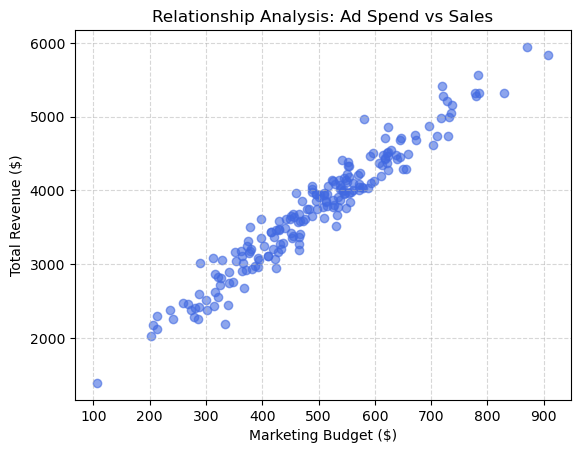

In [32]:
import matplotlib.pyplot as plt

# --- Visualizing the Relationship ---

# Create a scatter plot to check for linearity
# x = Independent variable (Ad Spend), y = Dependent variable (Sales)
# alpha=0.6 makes the dots slightly transparent to see overlapping points better
plt.scatter(df.Ad_Spend, df.sales, alpha=0.6, color='royalblue')

# Set the title and axis labels for clarity
plt.title("Relationship Analysis: Ad Spend vs Sales")
plt.xlabel("Marketing Budget ($)")
plt.ylabel("Total Revenue ($)")

# Draw a grid to make reading values easier (standard in professional plots)
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot window
plt.show()

Scikit-learn expects your $X$ (features) to be a 2D array (a table) and your $y$ (target) to be a 1D array (a list).



In [15]:
X = df[['Ad_Spend']] # Notice the double brackets for 2D
y = df['sales']

In [ ]:
# Split the data into training and testing sets
# X, y: Features and target variable
# test_size=0.2: 20% of data goes to testing, 80% to training
# random_state=42: Ensures the split is reproducible (you'll get the same results every time you run it)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data (finding the line of best fit)
model.fit(X_train, y_train)

# Output the calculated parameters
# The Slope (Coefficient) represents the change in Sales for every $1 spent on Ads
print(f"ROI Factor (Slope): ${model.coef_[0]:.2f}")

# The Intercept represents the predicted Sales if Ad Spend was zero
print(f"Base Sales (Intercept): ${model.intercept_:.2f}")


ROI Factor (slope) : $ 5.67 
Base Sales (Intercept): 933.83


In [ ]:
#Generate predictions using the unseen test data
prediction = model.predict(X_test)

# Calculate Mean Absolute Error (The average 'off' amount)
mae = mean_absolute_error(y_test, prediction)

# Calculate R-squared (The percentage of variance explained)
r2 = r2_score(y_test, prediction)

print(f"Model Accuracy (R2): {r2:.2f}")
print(f"Average Error: ${mae:.2f}")

Model Accuracy (R2): 0.91
Average Error: $162.12


In [27]:
# What if we spend $1,000 next month?
future_spend = np.array([[10000]])
predicted_revenue = model.predict(future_spend)
print(f"Predicted Revenue for ${future_spend} spend: ${predicted_revenue[0]:.2f}")


Predicted Revenue for $[[10000]] spend: $57591.65


c:\Users\praja\anaconda3\envs\marketing-roi\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
import joblib
import os

# Create the folder if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

# Save the trained model to the 'model' folder
joblib.dump(model, 'model/regression_model.pkl')

print("Model saved successfully in model/regression_model.pkl")

Model saved successfully in model/regression_model.pkl
